# Apprentissage non-supervisé

Jusqu'à maintenant nous avons vu que des modèles où nous avions des variables explicatives $X_1, \dots, X_p$ ainsi qu'un variable réponse $Y$ pour chaque observation. Le but était alors de prédire $Y$ en nous servant de ses charactéristiques $X_1, \dots, X_p$.

Ici, nous nous concentrons plutôt sur l'apprentissage non-supervisé, nous n'observons que les caractéristiques $X_1, X_2, \dots X_p$. Nous ne nous intéressons pas à la prédiction, car nous n'avons pas de variable réponse associée $Y$ .

L'objectif est de découvrir des aspects intéressants sur notre jeu de données en nous posons des question du genre: 
* existe-t-il un moyen informatif de visualiser les données ? (réduire le nombre de dimensions) 
* Peut-on découvrir des sous-groupes (_clusters_) parmi les variables ou parmi les observations ?

Nous répondons à ces deux questions en étudiant deux concept dans ce chapitre:


1. l'analyse par composantes principales (ACP) un outil utilisé pour les données visualisation ou prétraitement des données avant la supervision les techniques sont appliquées, et

2. le clustering, une variété de méthodes pour découvrir sous-groupes inconnus dans les données.

Ces méthodes sont souvent utilisé lorsque nous n'avons pas de variable réponse (Exemple import). En pratique, le plus grand défi en utilisant les méthodes non-superbisée est l'explication des résultats aux personnes, qui n'ont pas de connaissance mathématiques de ces modèles. Pour cela, il faut être prudent avec la présentation de ces méthodes.



# Analyse par composantes principales (ACP)

L'ACP produit une représentation en basse dimension d'un ensemble de données. On essaie de trouver une séquence de combinaisons linéaires des variables qui ont une variance maximale, et qui sont mutuellement non corrélées. Il permet aussi de créer de nouvelles variables dérivées à utiliser dans les problèmes d'apprentissage supervisé, l'ACP sert également d'outil de visualisation des données.

La première composante principale d'un ensemble de caractéristiques $X_1, X_2, \dots X_p$. est la combinaison linéaire normalisée des caractéristiques

$$
Z_1=\phi_{11}X_1+\phi_{21}X_2+\dots+\phi_{p1}X_p
$$

qui présente la plus grande variance. Par **_normalisée_** on veut dire $\sum_{j=1}^p \phi_{j1}^2=1$.

Nous nous référons aux éléments $\phi_{11}, \dots \phi_{p1}$ comme étant les chargements de la première composante principale ; ensemble, les charges constituent le principal vecteur de chargement des composants $\phi_1=(\phi_{11}+\phi_{21}+\dots+\phi_{p1})^T$.

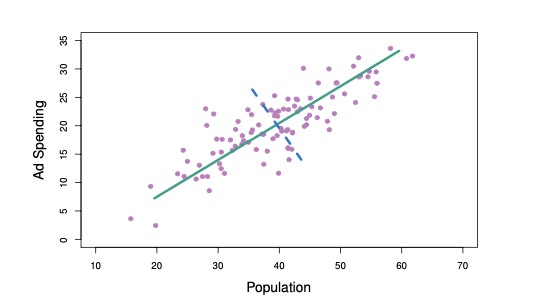

Nous limitons les charges de sorte que leur somme de carrés soit égale à un, car sinon le fait de fixer ces éléments à une valeur absolue arbitrairement élevée pourrait entraîner une variance arbitrairement importante.

# Calcul des composantes principales

Supposons que nous ayons un ensemble de données $X$ avec la dimension $n \ \text{x} \ p$. Comme nous ne nous intéressons qu'à la variance, nous supposons que chacune des variables de $X$ a été centrée pour avoir une moyenne nulle (c'est-à-dire que les moyennes des colonnes de X sont nulles).

Nous recherchons ensuite la combinaison linéaire des valeurs des caractéristiques de l'échantillon de la forme

\begin{equation}
Z_{i1}=\phi_{11}X_{i1}+\phi_{21}X_{i2}+\dots+\phi_{p1}X_{ip}
\end{equation}


pour $i = 1, \dots n$ qui présente la plus grande variance d'échantillon, sous réserve de la contrainte $\sum_{j=1}^p \phi_{j1}^2=1$.

Puisque chacun des $x_{ij}$ a une moyenne égale à zéro, la variance de l'échantillon de $z_{i1}$ peut donc s'écrire comme $\frac{1}{n}\sum_{i=1}^n z_{i1}^2$.

On résout le problème de l'optimisation:

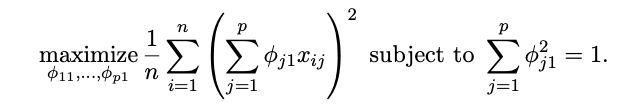

Nous désignons $Z_1$ comme la première composante principale, avec des valeurs réalisées $z_{11}, \dots , z_{n1}$

# Géométrie de l'ACP

Le vecteur de chargement $\phi_1$ avec les éléments $\phi_{11},\phi_{21}, \dots, \phi_{p1}$ définit une direction dans l'espace des éléments le long de laquelle les données varient le plus.

Si nous projetons les n points de données $x_1, \dots, x_n$ dans cette direction, les valeurs projetées sont les scores des composantes principales $z_{11}, \dots, z_{n1}$ elles-mêmes.

# Autres composantes principales

La deuxième composante principale est la combinaison linéaire de $X1, \dots Xp$ qui présente une variance maximale parmi toutes les combinaisons linéaires non corrélées avec $Z_1$. Les résultats de la deuxième composante principale $z_{12},z_{22},\dots,z_{n2}$ prennent la forme



\begin{equation}
Z_{i2}=\phi_{12}X_{i1}+\phi_{22}X_{i2}+\dots+\phi_{p2}X_{ip}
\end{equation}

où $\phi_2$ est le deuxième vecteur principal de chargement des composants, avec les éléments $\phi_{12}, \phi_{22}, . . . , \phi_{p2}$.

contraindre $Z_2$ à être non corrélé avec $Z_1$ équivaut à contraindre la direction $\phi_2$ à être orthogonale (perpendiculaire) à la direction $\phi1$. Et ainsi de suite.

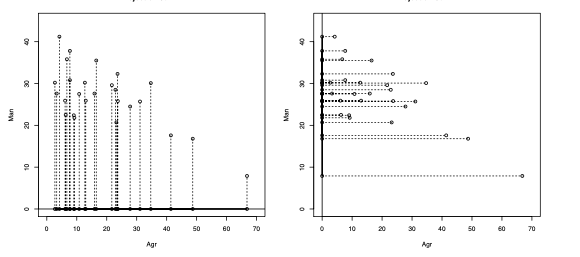

# Exemple

Dans cet exemple, nous effectuons une ACP sur l'ensemble des données de . Les lignes de l'ensemble de données contiennent les 50 États, par ordre alphabétique :

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/nmeraihi/data/master/islr/USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


* Murder--meurtre
* Assault--Agression
* Rape -- viol
* UrbanPop -- populations urbaitne

Les colonnes de l'ensemble de données contiennent quatre variables relatives à divers crimes :

In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


On voit bien que les données ont des moyens très différents. Nous pouvons également examiner les variances des quatre variables :

In [7]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Il n'est pas surprenant que les variables présentent également des variations très différentes : la variable 𝚄𝚛𝚋𝚊𝚗𝙿𝚘𝚙 mesure le pourcentage de la population de chaque État vivant dans une zone urbaine, ce qui n'est pas un chiffre comparable au nombre de crimes commis dans chaque État pour 100 000 individus. Si nous ne parvenions pas à mettre les variables à l'échelle avant d'effectuer l'ACP, la plupart des principales composantes que nous avons observées seraient alors déterminées par la variable 𝙰𝚜𝚜𝚊𝚞𝚕𝚝, puisqu'elle présente de loin la moyenne et la variance les plus élevées.

Il est donc important de normaliser les variables pour qu'elles aient une moyenne de zéro et un écart-type de 1 avant d'effectuer l'ACP. Nous pouvons le faire en utilisant la fonction `𝚜𝚌𝚊𝚕𝚎()` de `𝚜𝚔𝚕𝚎𝚊𝚛𝚗` :

In [8]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [9]:
X.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [11]:
X.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


Nous allons maintenant utiliser la fonction `𝙿𝙲𝙰()` de `𝚜𝚔𝚕𝚎𝚊𝚛𝚗` pour calculer les vecteurs de chargement :

In [12]:
from sklearn.decomposition import PCA

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


Nous voyons qu'il y a quatre composantes principales distinctes. Il faut s'y attendre car il y a en général $𝚖𝚒𝚗(𝚗-𝟷,𝚙)$ des composantes principales informatives dans un ensemble de données avec $n$ observations et $p$ variables.

En utilisant la fonction `𝚏𝚒𝚝𝚝𝚛𝚊𝚗𝚜𝚏𝚘𝚛𝚖()`, nous pouvons obtenir les scores des principales composantes des données originales. Nous allons examiner les premiers états :

In [13]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


On peut donc tracer les deux première CP sur graphique **biplot** car elle sont les plus importantes. 

In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

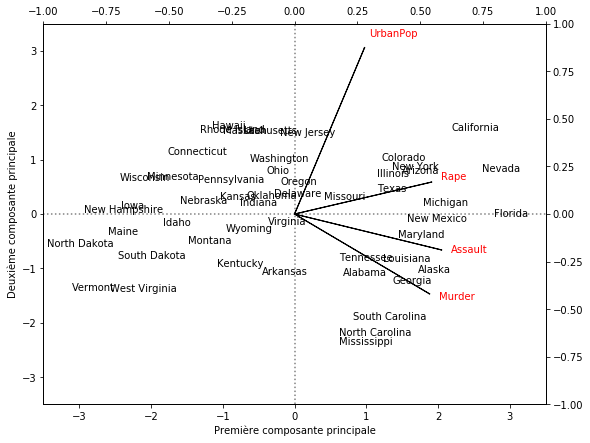

In [22]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)


for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')


ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Première composante principale')
ax1.set_ylabel('Deuxième composante principale')
    

ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)



a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')


ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])

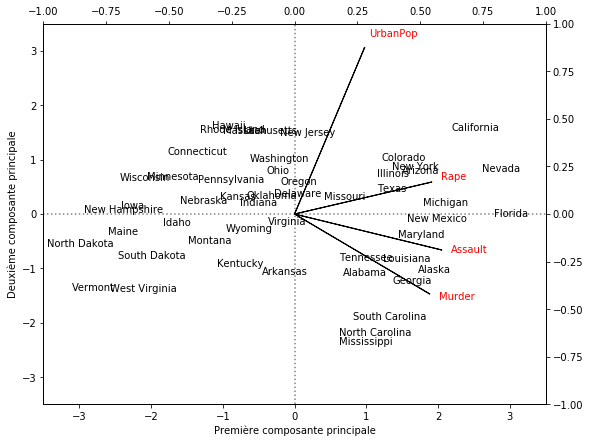

Chaque observation à un score par composatnte principale. Pour comprendre ces scores, on regarde les chargements; chaque variable a des coordonées sur la première et la deuxième CP, ce qui nous permet de tracer des vecteurs.


Sur la prenière CP, les 4 variables ont des chargements + où les crime est le plus élevé. Donc la floride par exemple a le tx de crime les plus élevé.

La deuxième CP montre (vecteur vers le haut), montre que les chargement sont positves dans les régions les plus populée.

Par exemple le crime `Rape` est plus élevé dans les régions les plus denses en population que les autres régions.

In [24]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


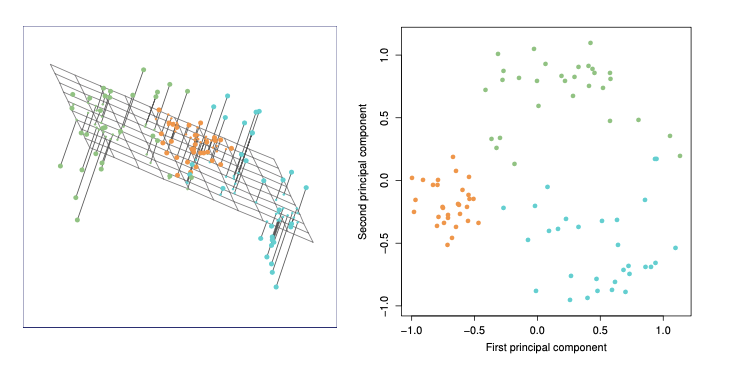

On approche un hyperplan le plus proche des points d'un façon le plus distrubuées, donc les directions des vecteurs qui définissnt l'hyperplan, sont les directions qui définissent les CP.

# Proportion Variance expliquée

Pour comprendre la force de chaque composante, nous sommes intéressés de connaître la proportion de variance expliquée (PVE) par chacune d'entre elles. La variance totale présente dans un ensemble de données (en supposant que les variables ont été centrées pour avoir une moyenne nulle) est définie comme

$$
\sum_{j=1}^p \text{Var}(X_j)=\sum_{j=1}^p  \frac{1}{n}\sum_{i=1}^n x_{ij}^2, 
$$

et la variance expliquée par la $m$ième composante principale est

$$
\text{Var}(Z_m)=\frac{1}{n}\sum_{i=1}^n z_{im}^2
$$

On peut montrer que $\sum_{j=1}^p \text{Var}(X_j)=\sum_{m=1}^M \text{Var}(Z_m)$ avec $M=min(n-1,p)$. Par conséquent, la PVE du $m$ème composante principale est donnée par une quantité positive entre 0 et 1

$$
\frac{\sum_{i=1}^n z_{im}^2}{\sum_{j=1}^p \sum_{i=1}^n x_{ij}^2}
$$

La fonction `𝙿𝙲𝙰()` produit également la variance expliquée par de chaque composante principale. Nous pouvons accéder à ces valeurs comme suit :

In [23]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

On peut aussi obtenir une la proportion de variance expliqué par le modèle:

In [26]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

On remarque que la première composante principale explique 62,0% de la variance des données, la composante principale suivante explique 24,7% de la variance, et ainsi de suite. Nous pouvons représenter graphiquement la proportion de variance expliqué par chaque composante comme suit :

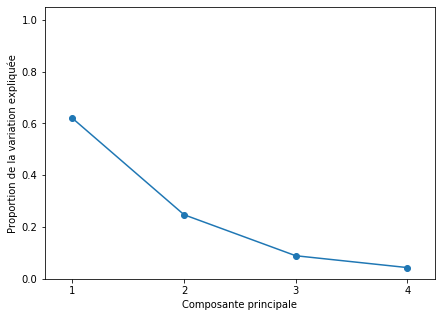

In [29]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion de la variation expliquée')
plt.xlabel('Composante principale')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4]);

Nous pouvons également utiliser la fonction 𝚌𝚞𝚖𝚜𝚞𝚖() , qui calcule la somme cumulée des éléments d'un tableau numérique, pour tracer le PVE cumulé :

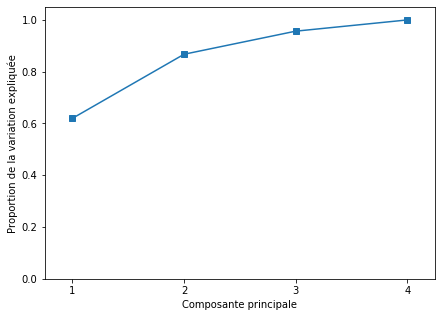

In [32]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion de la variation expliquée')
plt.xlabel('Composante principale')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4]);


Combien de composants principaux devrions-nous utiliser ?

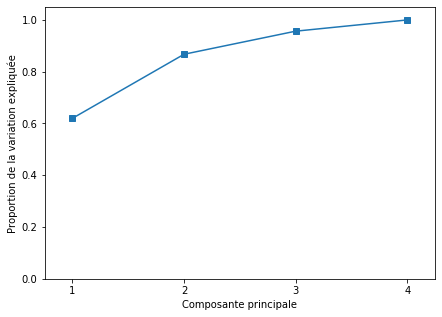

Ici, on peut s'arrêter à 3 CP puisque ces trois expliquent déjà 95% de la variance.